# Challenge - Make Your Own Regression Model

###### Import modules and ignore harmless seaborn warnings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler as mms
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###### Build DataFrame from csv file

In [3]:
nycrime = 'https://raw.githubusercontent.com/djrgit/coursework/master/thinkful/data_science/my_progress/unit_2_supervised_learning/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
df = pd.read_csv(nycrime, skiprows=4)

###### Rows 348-350 contain only comments explaining the data; trim these rows

In [4]:
df = df[:348]

###### Preview the DataFrame before cleaning

In [5]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


In [6]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

###### Clean the data - Ensure numerical data is treated as such

In [7]:
def floatify(x):
    try:
        if ',' in str(x):
            x = x.replace(',', '')
        x = float(x)
    except ValueError:
        x = None
    return x

In [8]:
for col in df.columns:
    if col != 'City':
        df[col] = df[col].apply(floatify)

In [9]:
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

In [10]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


###### Clean the data - Drop a column of NaNs and rename other columns for readability

In [11]:
df['Rape\n(revised\ndefinition)1'].unique()

array([nan])

In [12]:
df = df.drop(columns=['Rape\n(revised\ndefinition)1'])

In [13]:
df = df.rename(columns={'Violent\ncrime': 'Violent_crime', 
                        'Murder and\nnonnegligent\nmanslaughter': 'Murder',
                        'Rape\n(legacy\ndefinition)2': 'Rape_legacy_def',
                        'Aggravated\nassault': 'Agg_assault',
                        'Property\ncrime': 'Prop_crime',
                        'Larceny-\ntheft': 'Larceny_theft',
                        'Motor\nvehicle\ntheft': 'Mot_vehicle_theft'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
City                 348 non-null object
Population           348 non-null float64
Violent_crime        348 non-null float64
Murder               348 non-null float64
Rape_legacy_def      348 non-null float64
Robbery              348 non-null float64
Agg_assault          348 non-null float64
Prop_crime           348 non-null float64
Burglary             348 non-null float64
Larceny_theft        348 non-null float64
Mot_vehicle_theft    348 non-null float64
Arson3               187 non-null float64
dtypes: float64(11), object(1)
memory usage: 32.7+ KB


###### Gather some basic statistical data for columns with numerical data

In [15]:
df.describe()

,Population,Violent_crime,Murder,Rape_legacy_def,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson3
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [16]:
df.head()

,City,Population,Violent_crime,Murder,Rape_legacy_def,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson3
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [17]:
sns.set_style('darkgrid')

###### How does property crime vary with population?

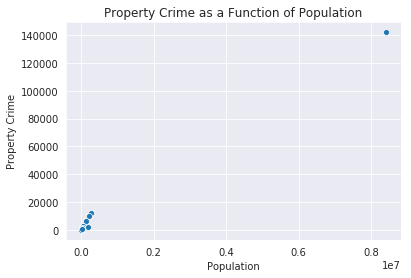

In [18]:
sns.scatterplot(x='Population', y='Prop_crime', data=df)
plt.title('Property Crime as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.show()

###### How does murder vary with population?

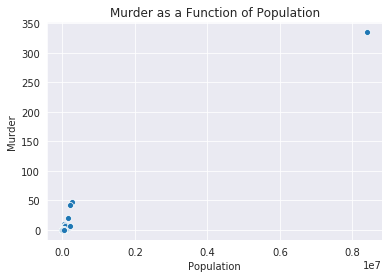

In [19]:
sns.scatterplot(x='Population', y='Murder', data=df)
plt.title('Murder as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Murder')
plt.show()

###### How does robbery vary with population?

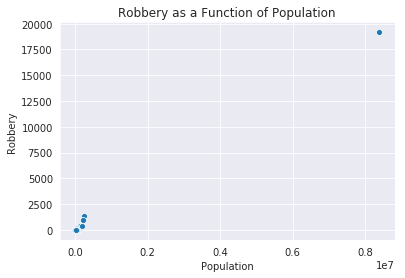

In [20]:
sns.scatterplot(x='Population', y='Robbery', data=df)
plt.title('Robbery as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Robbery')
plt.show()

###### There seems to be an outlier city with a population of over 8,000,000 people

In [21]:
df[df['Population'] > 8000000]

,City,Population,Violent_crime,Murder,Rape_legacy_def,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson3
216,New York,8396126.0,52384.0,335.0,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,NaN


###### New York City seems to be an outlier and may be best compared with other large cities with more than one million people

In [22]:
# New York City may be in a class of its own - let's exclude it for now
df_lt_8M_people = df[df['Population'] < 8000000]

###### How does property crime vary with population in cities with less than 8,000,000 people?

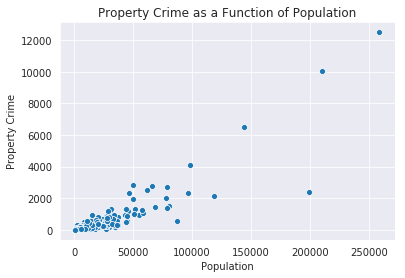

In [23]:
sns.scatterplot(x='Population', y='Prop_crime', data=df_lt_8M_people)
plt.title('Property Crime as a Function of Population')
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.show()

(array([327.,  12.,   4.,   1.,   0.,   1.,   0.,   0.,   1.,   1.]),
 array([    0. ,  1249.1,  2498.2,  3747.3,  4996.4,  6245.5,  7494.6,
         8743.7,  9992.8, 11241.9, 12491. ]),
 <a list of 10 Patch objects>)

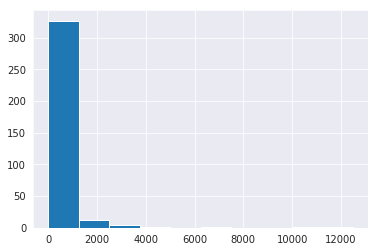

In [24]:
plt.hist(df_lt_8M_people['Prop_crime'])

###### Attempt to transform the property crime data into a more normal distribution

(array([ 6.,  4., 28., 50., 78., 71., 63., 27., 11.,  3.]),
 array([0.        , 0.94327637, 1.88655273, 2.8298291 , 3.77310547,
        4.71638183, 5.6596582 , 6.60293456, 7.54621093, 8.4894873 ,
        9.43276366]),
 <a list of 10 Patch objects>)

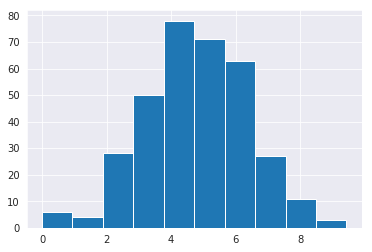

In [25]:
plt.hist(np.log(df_lt_8M_people[df_lt_8M_people['Prop_crime'] > 0]['Prop_crime']))

###### Start building model DataFrame to include records where there were instances of property crime

In [26]:
df_copy = df_lt_8M_people[df_lt_8M_people['Prop_crime'] > 0]
model = df_copy[['Prop_crime', 'Population']].copy()
model['log_Prop_crime'] = np.log(model['Prop_crime'])
model['Population^2'] = df_copy['Population']**2
model['Burglary_tf'] = df_copy['Burglary'] > 0
model['Murder_tf'] = df_copy['Murder'] > 0
model['Robbery_tf'] = df_copy['Robbery'] > 0
model['Larceny_theft_tf'] = df_copy['Larceny_theft'] > 0
model['Burglary_tf'] = model['Burglary_tf'].astype(int)
model['Murder_tf'] = model['Murder_tf'].astype(int)
model['Robbery_tf'] = model['Robbery_tf'].astype(int)
model['Larceny_theft_tf'] = model['Larceny_theft_tf'].astype(int)
model['Burglary'] = df_copy['Burglary']
model['Murder'] = df_copy['Murder']
model['Robbery'] = df_copy['Robbery']
model['Larceny_theft'] = df_copy['Larceny_theft']
model['minmax_Burglary'] = preproc.minmax_scale(df_copy[['Burglary']])
model['minmax_Murder'] = preproc.minmax_scale(df_copy[['Murder']])
model['minmax_Robbery'] = preproc.minmax_scale(df_copy[['Robbery']])
model['minmax_Larceny_theft'] = preproc.minmax_scale(df_copy[['Larceny_theft']])
model[['Burglary','Murder','Robbery','Larceny_theft']] = preproc.minmax_scale(df_copy[['Burglary','Murder','Robbery','Larceny_theft']])

In [27]:
df_copy[df_copy['Larceny_theft'] == 0]

,City,Population,Violent_crime,Murder,Rape_legacy_def,Robbery,Agg_assault,Prop_crime,Burglary,Larceny_theft,Mot_vehicle_theft,Arson3
128,Greene Village,1553.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [28]:
model.head()

,Prop_crime,Population,log_Prop_crime,Population^2,Burglary_tf,Murder_tf,Robbery_tf,Larceny_theft_tf,Burglary,Murder,Robbery,Larceny_theft,minmax_Burglary,minmax_Murder,minmax_Robbery,minmax_Larceny_theft
0,12.0,1861.0,2.484907,3.463321e+06,1,0,0,1,0.000578,0.000000,0.000000,0.001238,0.000578,0.000000,0.000000,0.001238
1,24.0,2577.0,3.178054,6.640929e+06,1,0,0,1,0.000868,0.000000,0.000000,0.002476,0.000868,0.000000,0.000000,0.002476
2,16.0,2846.0,2.772589,8.099716e+06,1,0,0,1,0.000289,0.000000,0.000000,0.001857,0.000289,0.000000,0.000000,0.001857
3,4090.0,97956.0,8.316300,9.595378e+09,1,1,1,1,0.203875,0.170213,0.171710,0.401560,0.203875,0.170213,0.171710,0.401560
4,223.0,6388.0,5.407172,4.080654e+07,1,0,1,1,0.015327,0.000000,0.003026,0.020431,0.015327,0.000000,0.003026,0.020431


In [29]:
model = model[['Prop_crime', 'log_Prop_crime', 'Population', 'Population^2', 
               'minmax_Burglary', 'minmax_Murder', 'minmax_Robbery', 'minmax_Larceny_theft', 
               'Burglary', 'Burglary_tf', 'Murder', 'Murder_tf', 
               'Robbery', 'Robbery_tf', 'Larceny_theft', 'Larceny_theft_tf']]

In [30]:
model.head()

,Prop_crime,log_Prop_crime,Population,Population^2,minmax_Burglary,minmax_Murder,minmax_Robbery,minmax_Larceny_theft,Burglary,Burglary_tf,Murder,Murder_tf,Robbery,Robbery_tf,Larceny_theft,Larceny_theft_tf
0,12.0,2.484907,1861.0,3.463321e+06,0.000578,0.000000,0.000000,0.001238,0.000578,1,0.000000,0,0.000000,0,0.001238,1
1,24.0,3.178054,2577.0,6.640929e+06,0.000868,0.000000,0.000000,0.002476,0.000868,1,0.000000,0,0.000000,0,0.002476,1
2,16.0,2.772589,2846.0,8.099716e+06,0.000289,0.000000,0.000000,0.001857,0.000289,1,0.000000,0,0.000000,0,0.001857,1
3,4090.0,8.316300,97956.0,9.595378e+09,0.203875,0.170213,0.171710,0.401560,0.203875,1,0.170213,1,0.171710,1,0.401560,1
4,223.0,5.407172,6388.0,4.080654e+07,0.015327,0.000000,0.003026,0.020431,0.015327,1,0.000000,0,0.003026,1,0.020431,1


In [31]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 347
Data columns (total 16 columns):
Prop_crime              341 non-null float64
log_Prop_crime          341 non-null float64
Population              341 non-null float64
Population^2            341 non-null float64
minmax_Burglary         341 non-null float64
minmax_Murder           341 non-null float64
minmax_Robbery          341 non-null float64
minmax_Larceny_theft    341 non-null float64
Burglary                341 non-null float64
Burglary_tf             341 non-null int64
Murder                  341 non-null float64
Murder_tf               341 non-null int64
Robbery                 341 non-null float64
Robbery_tf              341 non-null int64
Larceny_theft           341 non-null float64
Larceny_theft_tf        341 non-null int64
dtypes: float64(12), int64(4)
memory usage: 45.3 KB


###### How are the other variables distributed?

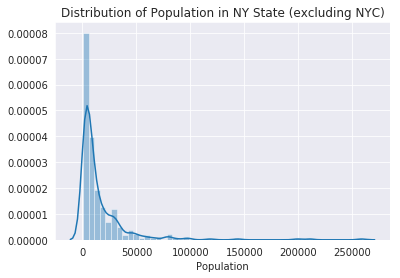

In [32]:
sns.distplot(model['Population'])
plt.title('Distribution of Population in NY State (excluding NYC)')
plt.xlabel('Population')
plt.show()

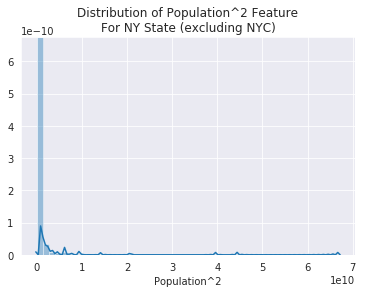

In [33]:
sns.distplot(model['Population^2'])
plt.title('Distribution of Population^2 Feature\nFor NY State (excluding NYC)')
plt.xlabel('Population^2')
plt.show()

###### The distribution plots above do not have a normal distribution - let's try some transformations

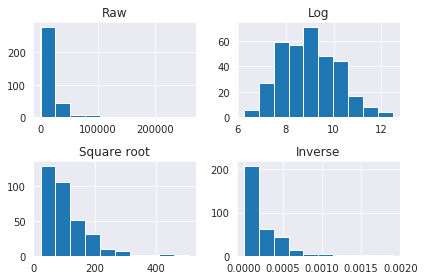

In [34]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(model['Population'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(model['Population'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(model['Population'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/model['Population'].dropna())
plt.title('Inverse')
plt.tight_layout()
plt.show()

In [35]:
# Using the log transformation of the Population feature provides a more normal distribution
model['log_Pop'] = np.log(model['Population'])

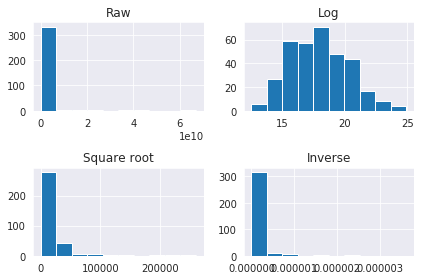

In [36]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(model['Population^2'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(model['Population^2'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(model['Population^2'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/model['Population^2'].dropna())
plt.title('Inverse')
plt.tight_layout()
plt.show()

In [37]:
# Using the log transformation of the Population^2 feature provides a more normal distribution
model['log_Pop^2'] = np.log(model['Population^2'])

###### Newly prepped model DataFrame

In [38]:
model.head()

,Prop_crime,log_Prop_crime,Population,Population^2,minmax_Burglary,minmax_Murder,minmax_Robbery,minmax_Larceny_theft,Burglary,Burglary_tf,Murder,Murder_tf,Robbery,Robbery_tf,Larceny_theft,Larceny_theft_tf,log_Pop,log_Pop^2
0,12.0,2.484907,1861.0,3.463321e+06,0.000578,0.000000,0.000000,0.001238,0.000578,1,0.000000,0,0.000000,0,0.001238,1,7.528869,15.057739
1,24.0,3.178054,2577.0,6.640929e+06,0.000868,0.000000,0.000000,0.002476,0.000868,1,0.000000,0,0.000000,0,0.002476,1,7.854381,15.708762
2,16.0,2.772589,2846.0,8.099716e+06,0.000289,0.000000,0.000000,0.001857,0.000289,1,0.000000,0,0.000000,0,0.001857,1,7.953670,15.907340
3,4090.0,8.316300,97956.0,9.595378e+09,0.203875,0.170213,0.171710,0.401560,0.203875,1,0.170213,1,0.171710,1,0.401560,1,11.492274,22.984547
4,223.0,5.407172,6388.0,4.080654e+07,0.015327,0.000000,0.003026,0.020431,0.015327,1,0.000000,0,0.003026,1,0.020431,1,8.762177,17.524353


In [39]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 347
Data columns (total 18 columns):
Prop_crime              341 non-null float64
log_Prop_crime          341 non-null float64
Population              341 non-null float64
Population^2            341 non-null float64
minmax_Burglary         341 non-null float64
minmax_Murder           341 non-null float64
minmax_Robbery          341 non-null float64
minmax_Larceny_theft    341 non-null float64
Burglary                341 non-null float64
Burglary_tf             341 non-null int64
Murder                  341 non-null float64
Murder_tf               341 non-null int64
Robbery                 341 non-null float64
Robbery_tf              341 non-null int64
Larceny_theft           341 non-null float64
Larceny_theft_tf        341 non-null int64
log_Pop                 341 non-null float64
log_Pop^2               341 non-null float64
dtypes: float64(14), int64(4)
memory usage: 50.6 KB


In [40]:
model.describe()

,Prop_crime,log_Prop_crime,Population,Population^2,minmax_Burglary,minmax_Murder,minmax_Robbery,minmax_Larceny_theft,Burglary,Burglary_tf,Murder,Murder_tf,Robbery,Robbery_tf,Larceny_theft,Larceny_theft_tf,log_Pop,log_Pop^2
count,341.000000,341.000000,341.000000,3.410000e+02,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,392.539589,4.765581,16215.431085,1.003157e+09,0.021239,0.013103,0.013753,0.037674,0.021239,0.956012,0.013103,0.140762,0.013753,0.609971,0.037674,0.997067,8.968731,17.937462
std,1042.174715,1.586335,27246.899953,5.110046e+09,0.077239,0.079548,0.072448,0.089203,0.077239,0.205370,0.079548,0.348287,0.072448,0.488473,0.089203,0.054153,1.172354,2.344708
min,1.000000,0.000000,526.000000,2.766760e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.265301,12.530602
25%,42.000000,3.737670,3064.000000,9.388096e+06,0.001735,0.000000,0.000000,0.003962,0.001735,1.000000,0.000000,0.000000,0.000000,0.000000,0.003962,1.000000,8.027477,16.054953
50%,114.000000,4.736198,7458.000000,5.562176e+07,0.005205,0.000000,0.000756,0.011763,0.005205,1.000000,0.000000,0.000000,0.000756,1.000000,0.011763,1.000000,8.917043,17.834085
75%,341.000000,5.831882,19164.000000,3.672589e+08,0.015038,0.000000,0.003782,0.035661,0.015038,1.000000,0.000000,0.000000,0.003782,1.000000,0.035661,1.000000,9.860789,19.721578
max,12491.000000,9.432764,258789.000000,6.697175e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.463768,24.927537


###### What does a pairplot look like?

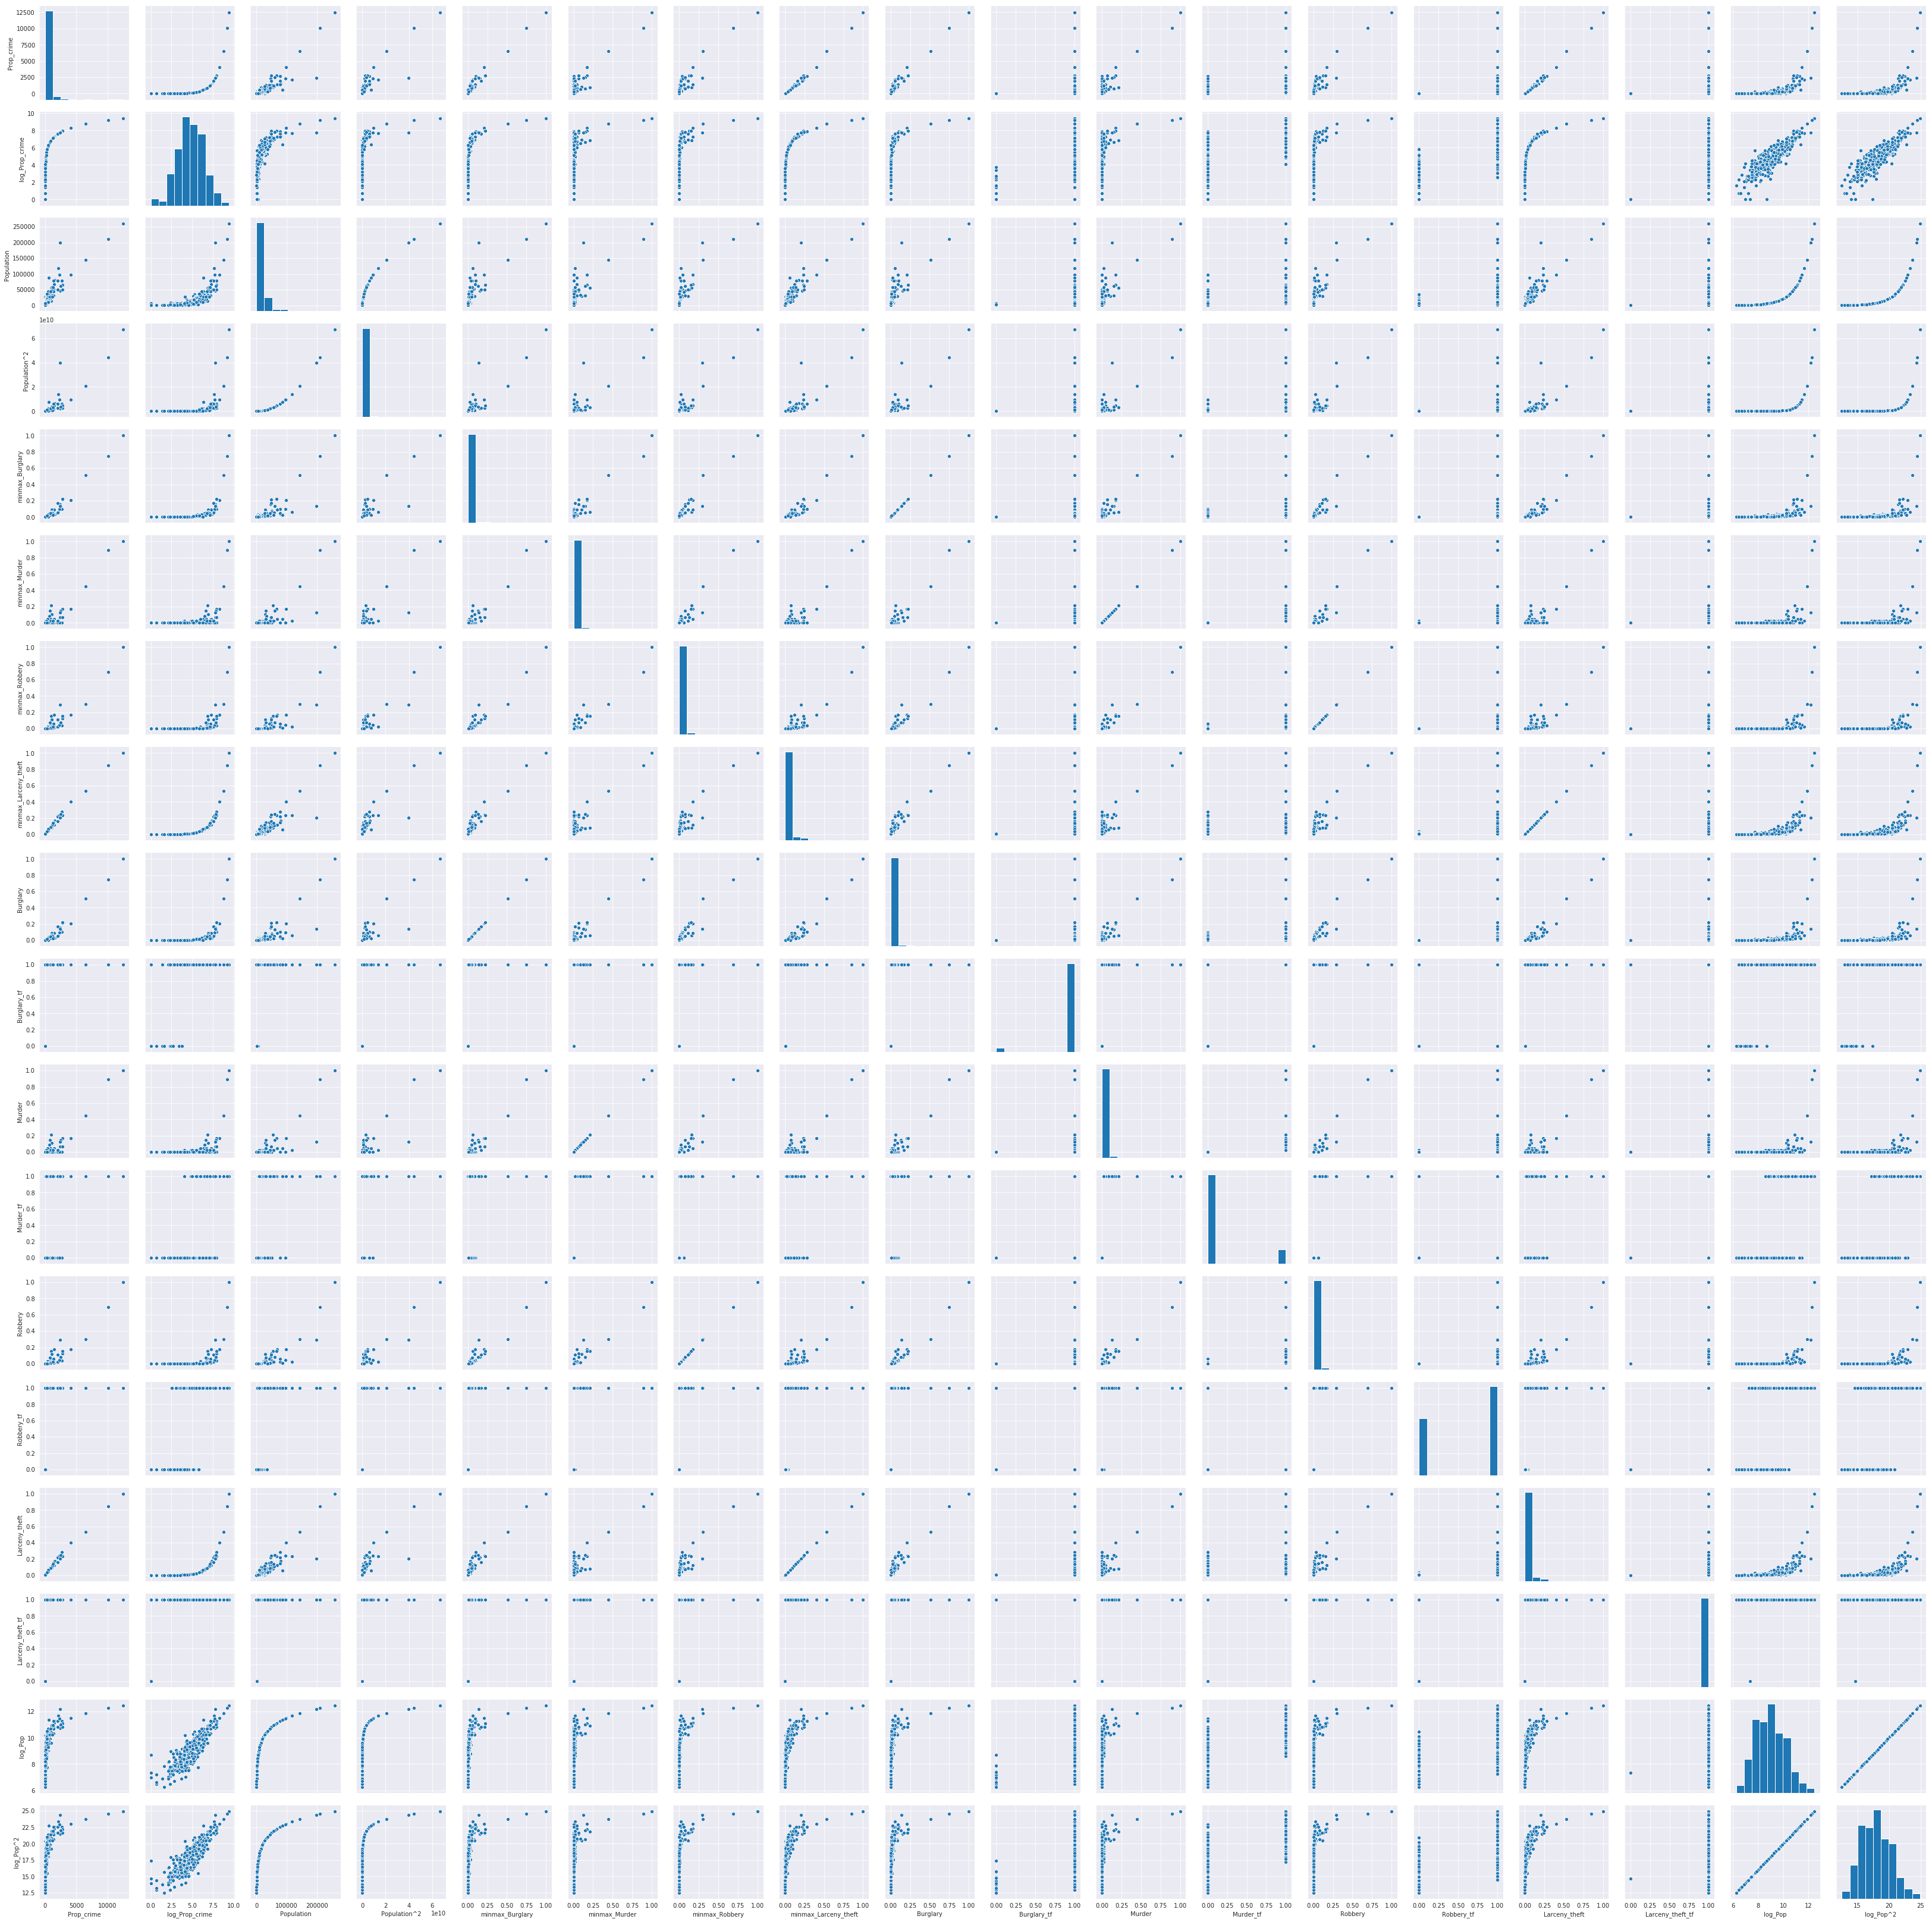

In [41]:
sns.pairplot(model)
plt.show()

In [42]:
model.corr()

,Prop_crime,log_Prop_crime,Population,Population^2,minmax_Burglary,minmax_Murder,minmax_Robbery,minmax_Larceny_theft,Burglary,Burglary_tf,Murder,Murder_tf,Robbery,Robbery_tf,Larceny_theft,Larceny_theft_tf,log_Pop,log_Pop^2
Prop_crime,1.000000,0.565927,0.887081,0.893572,0.976654,0.917402,0.933087,0.994635,0.976654,0.078522,0.917402,0.442008,0.933087,0.262528,0.994635,0.020405,0.553033,0.553033
log_Prop_crime,0.565927,1.000000,0.648647,0.390121,0.462898,0.352733,0.389747,0.608347,0.462898,0.400512,0.352733,0.477157,0.389747,0.681228,0.608347,0.163162,0.860203,0.860203
Population,0.887081,0.648647,1.000000,0.889335,0.819735,0.756987,0.816104,0.900895,0.819735,0.114480,0.756987,0.500891,0.816104,0.337990,0.900895,0.029227,0.739797,0.739797
Population^2,0.893572,0.390121,0.889335,1.000000,0.892909,0.883593,0.939918,0.872753,0.892909,0.041982,0.883593,0.344102,0.939918,0.150141,0.872753,0.010636,0.432229,0.432229
minmax_Burglary,0.976654,0.462898,0.819735,0.892909,1.000000,0.956267,0.964152,0.949629,1.000000,0.059069,0.956267,0.400705,0.964152,0.194208,0.949629,0.014731,0.451600,0.451600
minmax_Murder,0.917402,0.352733,0.756987,0.883593,0.956267,1.000000,0.963275,0.881757,0.956267,0.035384,1.000000,0.407555,0.963275,0.130296,0.881757,0.008946,0.357399,0.357399
minmax_Robbery,0.933087,0.389747,0.816104,0.939918,0.964152,0.963275,1.000000,0.898702,0.964152,0.040631,0.963275,0.377040,1.000000,0.152023,0.898702,0.010310,0.398296,0.398296
minmax_Larceny_theft,0.994635,0.608347,0.900895,0.872753,0.949629,0.881757,0.898702,1.000000,0.949629,0.087328,0.881757,0.456107,0.898702,0.292481,1.000000,0.022938,0.593021,0.593021
Burglary,0.976654,0.462898,0.819735,0.892909,1.000000,0.956267,0.964152,0.949629,1.000000,0.059069,0.956267,0.400705,0.964152,0.194208,0.949629,0.014731,0.451600,0.451600
Burglary_tf,0.078522,0.400512,0.114480,0.041982,0.059069,0.035384,0.040631,0.087328,0.059069,1.000000,0.035384,0.086821,0.040631,0.238933,0.087328,-0.011633,0.315995,0.315995


In [43]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
y = model['log_Prop_crime'].values.reshape(-1, 1)
X = model[['log_Pop', 'Burglary', 'Murder', 'Robbery', 'Larceny_theft']]
regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [[ 0.93642753  1.97849031 -4.077895   -4.49904393  8.38374371]]

Intercept: 
 [-3.87554613]

R-squared:
0.7744799845416369


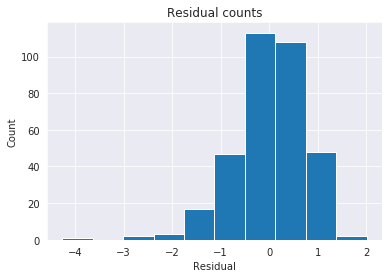

In [44]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = model['log_Prop_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

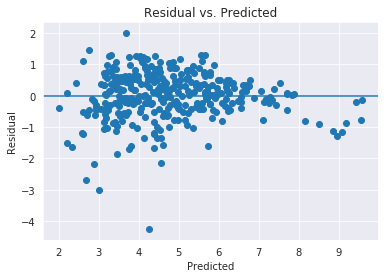

In [45]:
# Scedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()